In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm

In [2]:
df = pd.read_csv('data/electric_demand/energy_dataset.csv')

In [3]:
df = df[['time','total load actual']]

temp_s = pd.to_datetime(df['time'])
temp_s = temp_s.apply(lambda x: x.strftime('%Y-%m'))

df['time'] = temp_s

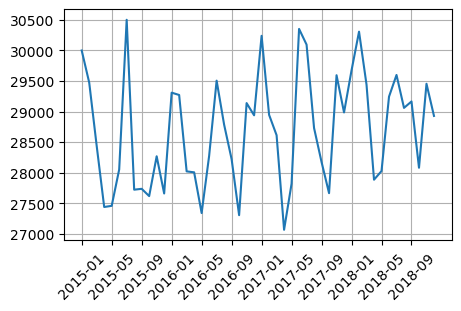

In [4]:
temp_df = df.groupby('time').agg('mean').reset_index()

plt.figure(figsize=(5,3))
plt.plot(temp_df.time, temp_df['total load actual'])
plt.xticks(np.arange(len(temp_df['time']))[::4],temp_df['time'][::4])
plt.tick_params(axis='x', labelrotation=45)
plt.grid()

<AxesSubplot:xlabel='month', ylabel='total load actual'>

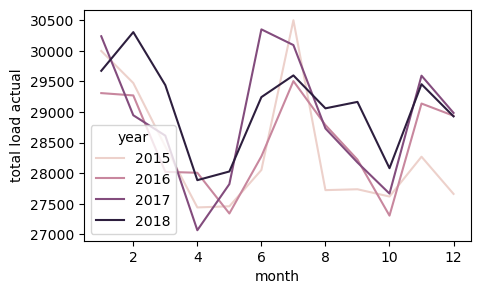

In [5]:
plt.figure(figsize=(5,3))
temp_df['month'] = temp_df['time'].apply(lambda x: pd.to_datetime(x).date().month)
temp_df['year'] = temp_df['time'].apply(lambda x: pd.to_datetime(x).date().year)
sns.lineplot(data=temp_df, x='month', y='total load actual', hue='year', legend='full')

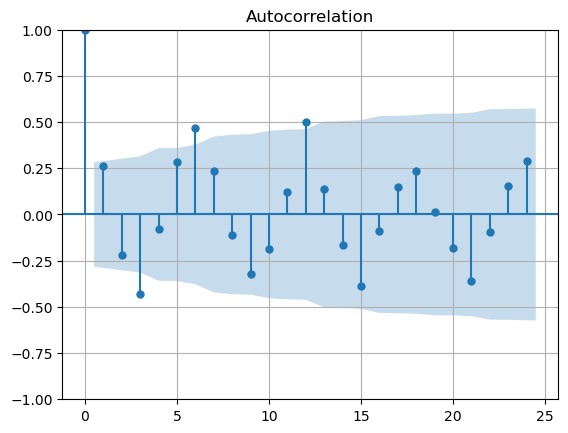

In [10]:
# acf
import statsmodels as sm
sm.graphics.tsaplots.plot_acf(temp_df['total load actual'].values, lags=24)
plt.grid()
plt.show()